In [ ]:
import os
import cv2
from typing import Union

def save_video_frames(video_path: str, output_folder: str, num_images: int) -> None:
    """
    Extracts frames from a video and saves them as images in a specified folder.

    Args:
        video_path (str): The path to the input video file.
        output_folder (str): The path to the folder where the images will be saved.
        num_images (int): The number of images to extract from the video.

    Returns:
        None
    """
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the frame interval to achieve the desired number of images
    frame_interval = total_frames // num_images

    # Initialize the frame counter
    frame_count = 0

    while True:
        # Read a frame from the video
        ret, frame = video.read()

        # Break the loop if no more frames are available
        if not ret:
            break

        # Save the frame as an image if the frame interval is reached
        if frame_count % frame_interval == 0:
            image_path = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
            cv2.imwrite(image_path, frame)

        # Increment the frame counter
        frame_count += 1

    # Release the video object
    video.release()

    print(f"Extracted {num_images} images from the video and saved them in {output_folder}.")



In [13]:
import os
import cv2
from typing import Union

def extract_frames(video_path: str, output_folder: str, num_frames: int) -> None:
    """
    Extract frames from a video and save them in a specified folder.

    Args:
        video_path (str): Path to the input video file.
        output_folder (str): Path to the folder where frames will be saved.
        num_frames (int): Number of frames to extract.
    """
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the frame interval to extract num_frames frames
    frame_interval = total_frames // num_frames

    # Initialize the frame counter
    frame_count = 0

    while True:
        # Read a frame from the video
        ret, frame = video.read()

        if not ret:
            break

        # Save the frame if it's at the desired interval
        if frame_count % frame_interval == 0:
            frame_path = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
            cv2.imwrite(frame_path, frame)

        frame_count += 1

    # Release the video object
    video.release()

def main() -> None:
    video_path = "C:/Users/heman/Videos/Captures/12.mp4"
    output_folder = "output"
    num_frames = 100


    extract_frames(video_path, output_folder, num_frames)

if __name__ == "__main__":
    main()


In [3]:
import os
import cv2
from typing import Union

def extract_frames(video_path: str, output_folder: str, num_frames: int) -> None:
    """
    Extract frames from a video and save them in a specified folder.

    Args:
        video_path (str): Path to the input video file.
        output_folder (str): Path to the folder where the frames will be saved.
        num_frames (int): Number of frames to extract.

    Returns:
        None
    """
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval between frames to extract
    interval = total_frames // num_frames

    # Initialize the frame counter
    frame_count = 0

    while True:
        # Read a frame from the video
        ret, frame = video.read()

        if not ret:
            break

        # Save the frame if it matches the interval
        if frame_count % interval == 0:
            frame_path = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
            cv2.imwrite(frame_path, frame)

        frame_count += 1

    # Release the video object
    video.release()

    print(f"Extracted {num_frames} frames from the video and saved them in {output_folder}.")

# Example usage
video_path = "C:/Users/heman/Videos/Captures/12.mp4"
output_folder = "output"
num_frames = 10

extract_frames(video_path, output_folder, num_frames)


Extracted 10 frames from the video and saved them in output.


In [4]:
import cv2
import numpy as np
from typing import Tuple, List

def extract_features(image_path: str) -> Tuple[List[float], List[float], List[float]]:
    """
    Extract features from an image using digital signal processing techniques.

    Args:
        image_path (str): Path to the input image file.

    Returns:
        Tuple[List[float], List[float], List[float]]: A tuple containing three lists of features:
            - Histogram of Oriented Gradients (HOG) features
            - Local Binary Patterns (LBP) features
            - Haralick texture features
    """
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Extract Histogram of Oriented Gradients (HOG) features
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(image)
    hog_features = hog_features.flatten().tolist()

    # Extract Local Binary Patterns (LBP) features
    lbp = cv2.LBPHFaceRecognizer_create()
    lbp_features = lbp.getLocalBinaryPatterns(image, 24, 8)
    lbp_features = lbp_features.flatten().tolist()

    # Extract Haralick texture features
    glcm = cv2.xfeatures2d.GLCM_create()
    haralick_features = glcm.computeHaralick(image)
    haralick_features = haralick_features.flatten().tolist()

    return hog_features, lbp_features, haralick_features

def main() -> None:
    image_path: str = "C:/Users/heman/Desktop/deeplearning/output/frame_0000.jpg"

    hog_features, lbp_features, haralick_features = extract_features(image_path)

    print("Histogram of Oriented Gradients (HOG) features:")
    print(hog_features)

    print("\nLocal Binary Patterns (LBP) features:")
    print(lbp_features)

    print("\nHaralick texture features:")
    print(haralick_features)

if __name__ == "__main__":
    main()


AttributeError: module 'cv2' has no attribute 'LBPHFaceRecognizer_create'

In [5]:
import cv2
import numpy as np
from typing import Tuple

def extract_image_features(image_path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Extract features from an image using advanced computer vision techniques.

    Args:
        image_path (str): Path to the input image file.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]:
            - Edges: Edge detection result.
            - Corners: Corner detection result.
            - Frequency_domain: Frequency domain representation of the image.
    """
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply edge detection using Canny edge detector
    edges = cv2.Canny(image, 100, 200)

    # Apply corner detection using Harris corner detector
    corners = cv2.cornerHarris(image, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)

    # Apply Fourier transform to obtain frequency domain representation
    frequency_domain = np.fft.fft2(image)
    frequency_domain = np.fft.fftshift(frequency_domain)
    frequency_domain = 20 * np.log(np.abs(frequency_domain))

    return edges, corners, frequency_domain

# Example usage
image_path = "C:/Users/heman/Desktop/deeplearning/output/frame_0000.jpg"
edges, corners, frequency_domain = extract_image_features(image_path)

# Display the results
cv2.imshow("Original Image", cv2.imread(image_path))
cv2.imshow("Edges", edges)
cv2.imshow("Corners", corners)
cv2.imshow("Frequency Domain", frequency_domain.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
import cv2
import numpy as np
from typing import Dict

def extract_image_features(image_path: str) -> Dict[str, np.ndarray]:
    """
    Extract features from an image using advanced computer vision techniques.

    Args:
        image_path (str): Path to the input image file.

    Returns:
        Dict[str, np.ndarray]: Dictionary containing the extracted features and their dimensions.
    """
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply edge detection using Canny edge detector
    edges = cv2.Canny(image, 100, 200)

    # Apply corner detection using Harris corner detector
    corners = cv2.cornerHarris(image, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)

    # Apply Fourier transform to obtain frequency domain representation
    frequency_domain = np.fft.fft2(image)
    frequency_domain = np.fft.fftshift(frequency_domain)
    frequency_domain = 20 * np.log(np.abs(frequency_domain))

    # Apply Sobel edge detection in both x and y directions
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Apply Laplacian edge detection
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Apply Gaussian blur
    gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply median blur
    median_blur = cv2.medianBlur(image, 5)

    # Apply bilateral filter
    bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)

    # Apply histogram equalization
    equalized_hist = cv2.equalizeHist(image)

    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Apply morphological operations
    kernel = np.ones((3, 3), np.uint8)
    erosion = cv2.erode(image, kernel, iterations=1)
    dilation = cv2.dilate(image, kernel, iterations=1)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    black_hat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

    # Create a dictionary to store the features and their dimensions
    features = {
        "Edges": edges,
        "Corners": corners,
        "Frequency Domain": frequency_domain,
        "Sobel X": sobel_x,
        "Sobel Y": sobel_y,
        "Laplacian": laplacian,
        "Gaussian Blur": gaussian_blur,
        "Median Blur": median_blur,
        "Bilateral Filter": bilateral_filter,
        "Equalized Histogram": equalized_hist,
        "Adaptive Thresholding": adaptive_thresh,
        "Erosion": erosion,
        "Dilation": dilation,
        "Opening": opening,
        "Closing": closing,
        "Gradient": gradient,
        "Top Hat": top_hat,
        "Black Hat": black_hat
    }

    # Print the dimensions of each feature
    for feature, data in features.items():
        print(f"{feature} dimensions: {data.shape}")

    return features

# Example usage
image_path ="C:/Users/heman/Desktop/deeplearning/output/frame_0000.jpg"
features = extract_image_features(image_path)


Edges dimensions: (1080, 1920)
Corners dimensions: (1080, 1920)
Frequency Domain dimensions: (1080, 1920)
Sobel X dimensions: (1080, 1920)
Sobel Y dimensions: (1080, 1920)
Laplacian dimensions: (1080, 1920)
Gaussian Blur dimensions: (1080, 1920)
Median Blur dimensions: (1080, 1920)
Bilateral Filter dimensions: (1080, 1920)
Equalized Histogram dimensions: (1080, 1920)
Adaptive Thresholding dimensions: (1080, 1920)
Erosion dimensions: (1080, 1920)
Dilation dimensions: (1080, 1920)
Opening dimensions: (1080, 1920)
Closing dimensions: (1080, 1920)
Gradient dimensions: (1080, 1920)
Top Hat dimensions: (1080, 1920)
Black Hat dimensions: (1080, 1920)


In [ ]:
import cv2
import numpy as np
from typing import Dict, Any

def extract_image_features(image_path: str) -> Dict[str, Any]:
    """
    Extract features from an image using advanced computer vision techniques.

    Args:
        image_path (str): Path to the input image file.

    Returns:
        Dict[str, Any]: A dictionary containing the extracted features and their dimensions.
    """
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply edge detection using Canny edge detector
    edges = cv2.Canny(image, 100, 200)

    # Apply corner detection using Harris corner detector
    corners = cv2.cornerHarris(image, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)

    # Apply Fourier transform to obtain frequency domain representation
    frequency_domain = np.fft.fft2(image)
    frequency_domain = np.fft.fftshift(frequency_domain)
    frequency_domain = 20 * np.log(np.abs(frequency_domain))

    # Apply Gaussian blur
    gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply median blur
    median_blur = cv2.medianBlur(image, 5)

    # Apply bilateral filter
    bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)

    # Apply Sobel filter for edge detection
    sobel_edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)

    # Apply Laplacian filter for edge detection
    laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)

    # Apply Scharr filter for edge detection
    scharr_edges = cv2.Scharr(image, cv2.CV_64F, 1, 0)

    # Apply Prewitt filter for edge detection
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_edges_x = cv2.filter2D(image, -1, kernelx)
    prewitt_edges_y = cv2.filter2D(image, -1, kernely)
    prewitt_edges = prewitt_edges_x + prewitt_edges_y

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image)

    # Apply adaptive thresholding
    adaptive_threshold = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Apply Otsu's thresholding
    _, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply Hough line transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    # Apply Hough circle transform
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

    # Apply template matching
    template = image[100:200, 100:200]
    template_matching = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

    # Apply feature matching using ORB
    orb = cv2.ORB_create()
    keypoints_1, descriptors_1 = orb.detectAndCompute(image, None)
    keypoints_2, descriptors_2 = orb.detectAndCompute(template, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors_1, descriptors_2)

    # Create a dictionary to store the extracted features and their dimensions
    features = {
        "edges": edges.shape,
        "corners": corners.shape,
        "frequency_domain": frequency_domain.shape,
        "gaussian_blur": gaussian_blur.shape,
        "median_blur": median_blur.shape,
        "bilateral_filter": bilateral_filter.shape,
        "sobel_edges": sobel_edges.shape,
        "laplacian_edges": laplacian_edges.shape,
        "scharr_edges": scharr_edges.shape,
        "prewitt_edges": prewitt_edges.shape,
        "equalized_image": equalized_image.shape,
        "adaptive_threshold": adaptive_threshold.shape,
        "otsu_threshold": otsu_threshold.shape,
        "lines": lines.shape if lines is not None else None,
        "circles": circles.shape if circles is not None else None,
        "template_matching": template_matching.shape,
        "keypoints_1": len(keypoints_1),
        "keypoints_2": len(keypoints_2),
        "matches": len(matches)
    }

    return features

# Example usage
image_path = "C:/Users/heman/Desktop/deeplearning/output/frame_0000.jpg"
features = extract_image_features(image_path)

# Print the extracted features and their dimensions
for feature, dimension in features.items():
    print(f"{feature}: {dimension}")


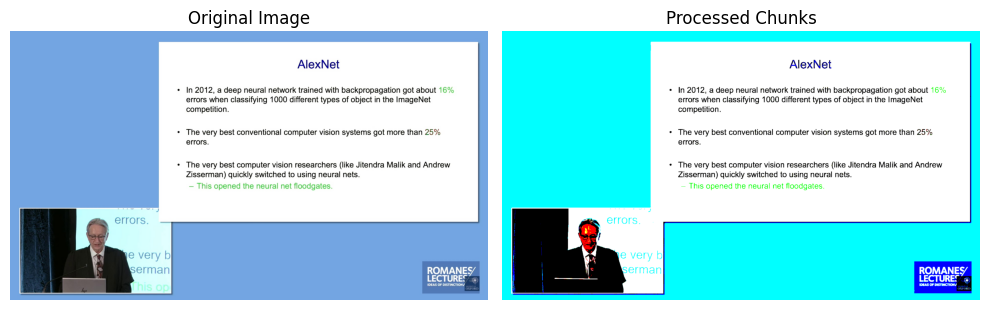

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

def process_chunk(chunk: np.ndarray) -> np.ndarray:
    """
    Process a single image chunk.
    
    Args:
        chunk: The image chunk to be processed.
    
    Returns:
        The processed image chunk.
    """
    # Perform processing on the chunk
    processed_chunk = chunk.copy()
    # Apply desired processing techniques here
    # Example: Applying a threshold
    processed_chunk[processed_chunk < 128] = 0
    processed_chunk[processed_chunk >= 128] = 255
    
    return processed_chunk

def split_and_process_image(image: np.ndarray, chunk_size: Tuple[int, int]) -> np.ndarray:
    """
    Split an image into chunks, process each chunk, and return the processed image.
    
    Args:
        image: The input image to be split and processed.
        chunk_size: The size of each chunk (height, width).
    
    Returns:
        The processed image after splitting and processing each chunk.
    """
    height, width = image.shape[:2]
    chunk_height, chunk_width = chunk_size
    
    processed_chunks = []
    
    for i in range(0, height, chunk_height):
        for j in range(0, width, chunk_width):
            chunk = image[i:min(i+chunk_height, height), j:min(j+chunk_width, width)]
            processed_chunk = process_chunk(chunk)
            processed_chunks.append(processed_chunk)
    
    # Determine the number of rows and columns for the processed chunks
    num_rows = (height + chunk_height - 1) // chunk_height
    num_cols = (width + chunk_width - 1) // chunk_width
    
    # Reshape the processed chunks into a 2D grid
    processed_chunks = [processed_chunks[i*num_cols:(i+1)*num_cols] for i in range(num_rows)]
    
    # Concatenate the processed chunks along the row and column axes
    processed_rows = [np.concatenate(row, axis=1) for row in processed_chunks]
    processed_image = np.concatenate(processed_rows, axis=0)
    
    return processed_image

# Example usage
image = plt.imread("C:/Users/heman/Desktop/deeplearning/output/frame_0000.jpg")
chunk_size = (10, 10)  # Specify the desired chunk size (height, width)

processed_image = split_and_process_image(image, chunk_size)

# Plot the original image and processed chunks
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(processed_image, cmap='gray')
axs[1].set_title('Processed Chunks')
axs[1].axis('off')

plt.tight_layout()
plt.show()


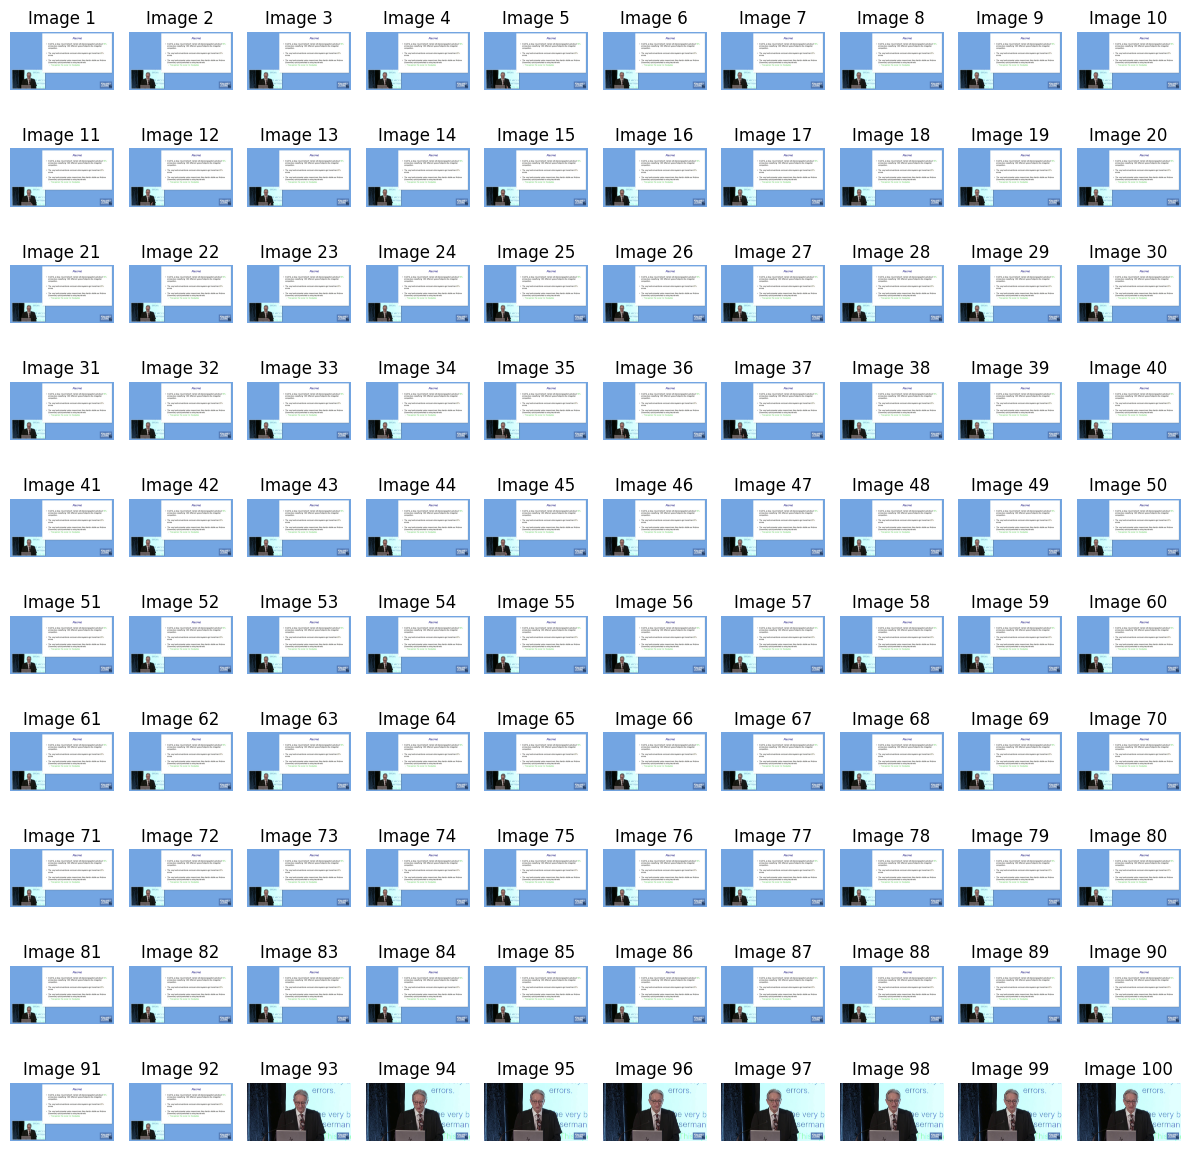

In [14]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_image_grid(folder_path: str, num_images: int):
    """
    Plot a grid of images from a specified folder.
    
    Args:
        folder_path: The path to the folder containing the images.
        num_images: The number of images to plot in the grid.
    """
    # Get the list of image files in the folder
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))  # Adjust the file extension if needed
    
    # Determine the grid dimensions
    num_rows = int(num_images ** 0.5)
    num_cols = (num_images + num_rows - 1) // num_rows
    
    # Create a figure and axes for the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    
    # Iterate over the image files and plot them in the grid
    for i, ax in enumerate(axes.flat):
        if i < len(image_files):
            img = mpimg.imread(image_files[i])
            ax.imshow(img)
            ax.set_title(f'Image {i+1}')
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
folder_path = 'C:/Users/heman/Desktop/deeplearning/output/'
num_images = 100  # Specify the number of images to plot in the grid

plot_image_grid(folder_path, num_images)


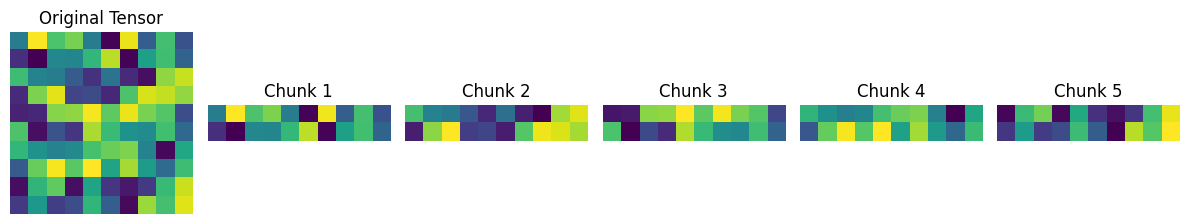

In [1]:
import torch
from typing import List, Tuple
import matplotlib.pyplot as plt

def split_tensor(tensor: torch.Tensor, chunks: int) -> List[torch.Tensor]:
    """
    Split a tensor into a specified number of chunks.

    Parameters:
    tensor (torch.Tensor): The input tensor to split.
    chunks (int): The number of chunks to split the tensor into.

    Returns:
    List[torch.Tensor]: A list of tensor chunks.
    """
    if chunks <= 0:
        raise ValueError("Number of chunks must be a positive integer.")
    
    split_tensors = tensor.chunk(chunks)
    return list(split_tensors)

def plot_tensors(original_tensor: torch.Tensor, tensor_chunks: List[torch.Tensor]) -> None:
    """
    Plot the original tensor and its chunks.

    Parameters:
    original_tensor (torch.Tensor): The original tensor before splitting.
    tensor_chunks (List[torch.Tensor]): The list of tensor chunks after splitting.

    Returns:
    None
    """
    plt.figure(figsize=(12, 8))

    # Plot the original tensor
    plt.subplot(1, len(tensor_chunks) + 1, 1)
    plt.imshow(original_tensor.numpy(), cmap='viridis')
    plt.title('Original Tensor')
    plt.axis('off')

    # Plot each chunk
    for i, chunk in enumerate(tensor_chunks, start=2):
        plt.subplot(1, len(tensor_chunks) + 1, i)
        plt.imshow(chunk.numpy(), cmap='viridis')
        plt.title(f'Chunk {i-1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Assuming the tensor is 2D for visualization purposes
    input_tensor = torch.rand(10, 10)  # Create a random 2D tensor
    num_chunks = int(input("Enter the number of chunks to split the tensor into: "))

    # Split the tensor
    tensor_chunks = split_tensor(input_tensor, num_chunks)

    # Plot the original tensor and its chunks
    plot_tensors(input_tensor, tensor_chunks)


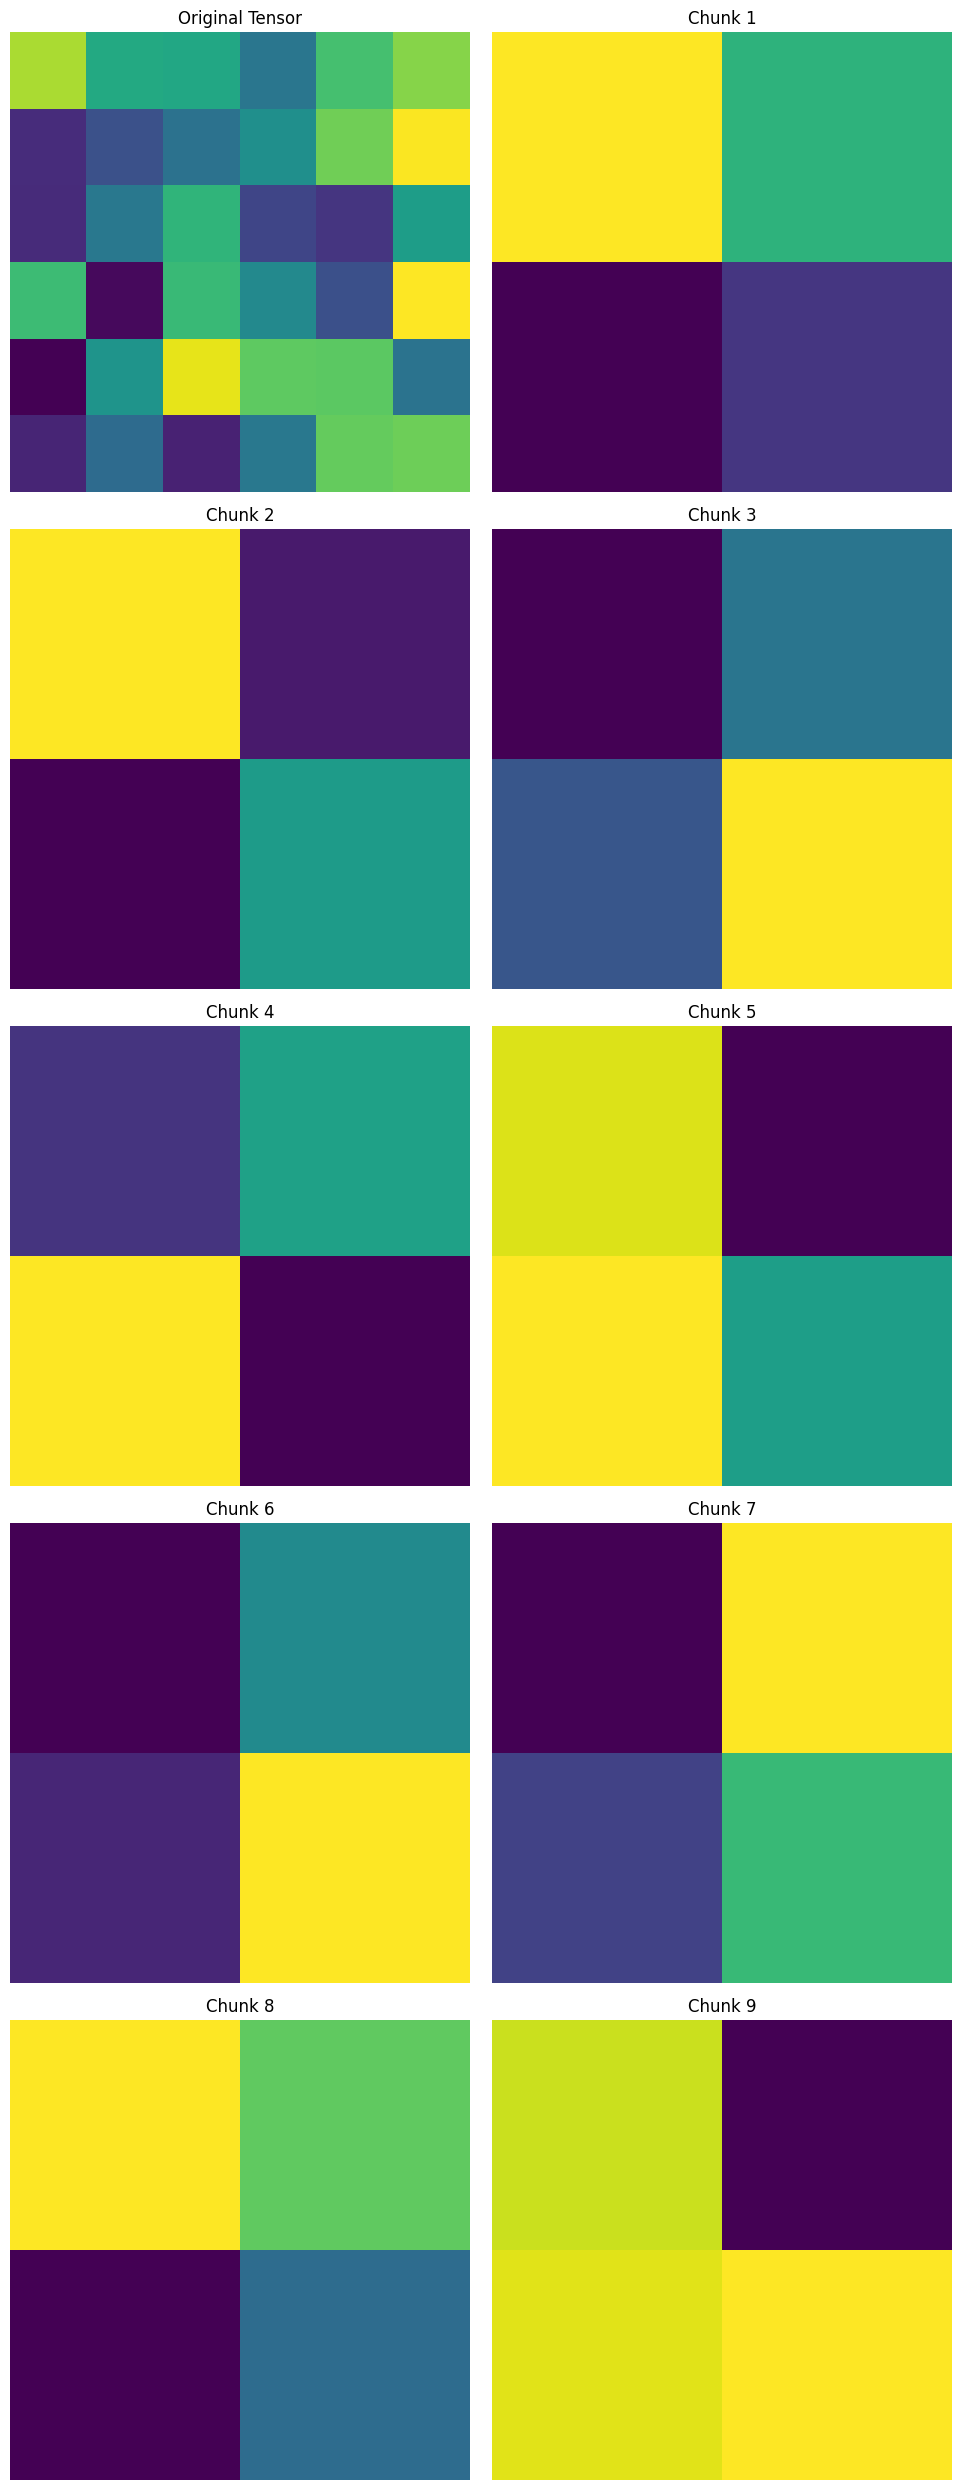

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def split_tensor(tensor: np.ndarray, chunk_size: Tuple[int, ...]) -> List[np.ndarray]:
    """
    Split a tensor into user-specific chunks.

    Args:
        tensor (np.ndarray): The input tensor to be split.
        chunk_size (Tuple[int, ...]): The size of each chunk as a tuple of integers.

    Returns:
        List[np.ndarray]: A list of split chunks.
    """
    chunks = []
    for i in range(0, tensor.shape[0], chunk_size[0]):
        for j in range(0, tensor.shape[1], chunk_size[1]):
            chunk = tensor[i:i+chunk_size[0], j:j+chunk_size[1]]
            chunks.append(chunk)
    return chunks

def plot_tensor_and_chunks(tensor: np.ndarray, chunks: List[np.ndarray]) -> None:
    """
    Plot the original tensor and the split chunks together.

    Args:
        tensor (np.ndarray): The original tensor.
        chunks (List[np.ndarray]): The list of split chunks.
    """
    num_chunks = len(chunks)
    num_rows = (num_chunks + 1) // 2
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))
    axes = axes.flatten()

    axes[0].imshow(tensor, cmap='viridis')
    axes[0].set_title("Original Tensor")
    axes[0].axis('off')

    for i, chunk in enumerate(chunks, start=1):
        axes[i].imshow(chunk, cmap='viridis')
        axes[i].set_title(f"Chunk {i}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
tensor = np.random.rand(6, 6)
chunk_size = (2, 2)

chunks = split_tensor(tensor, chunk_size)
plot_tensor_and_chunks(tensor, chunks)


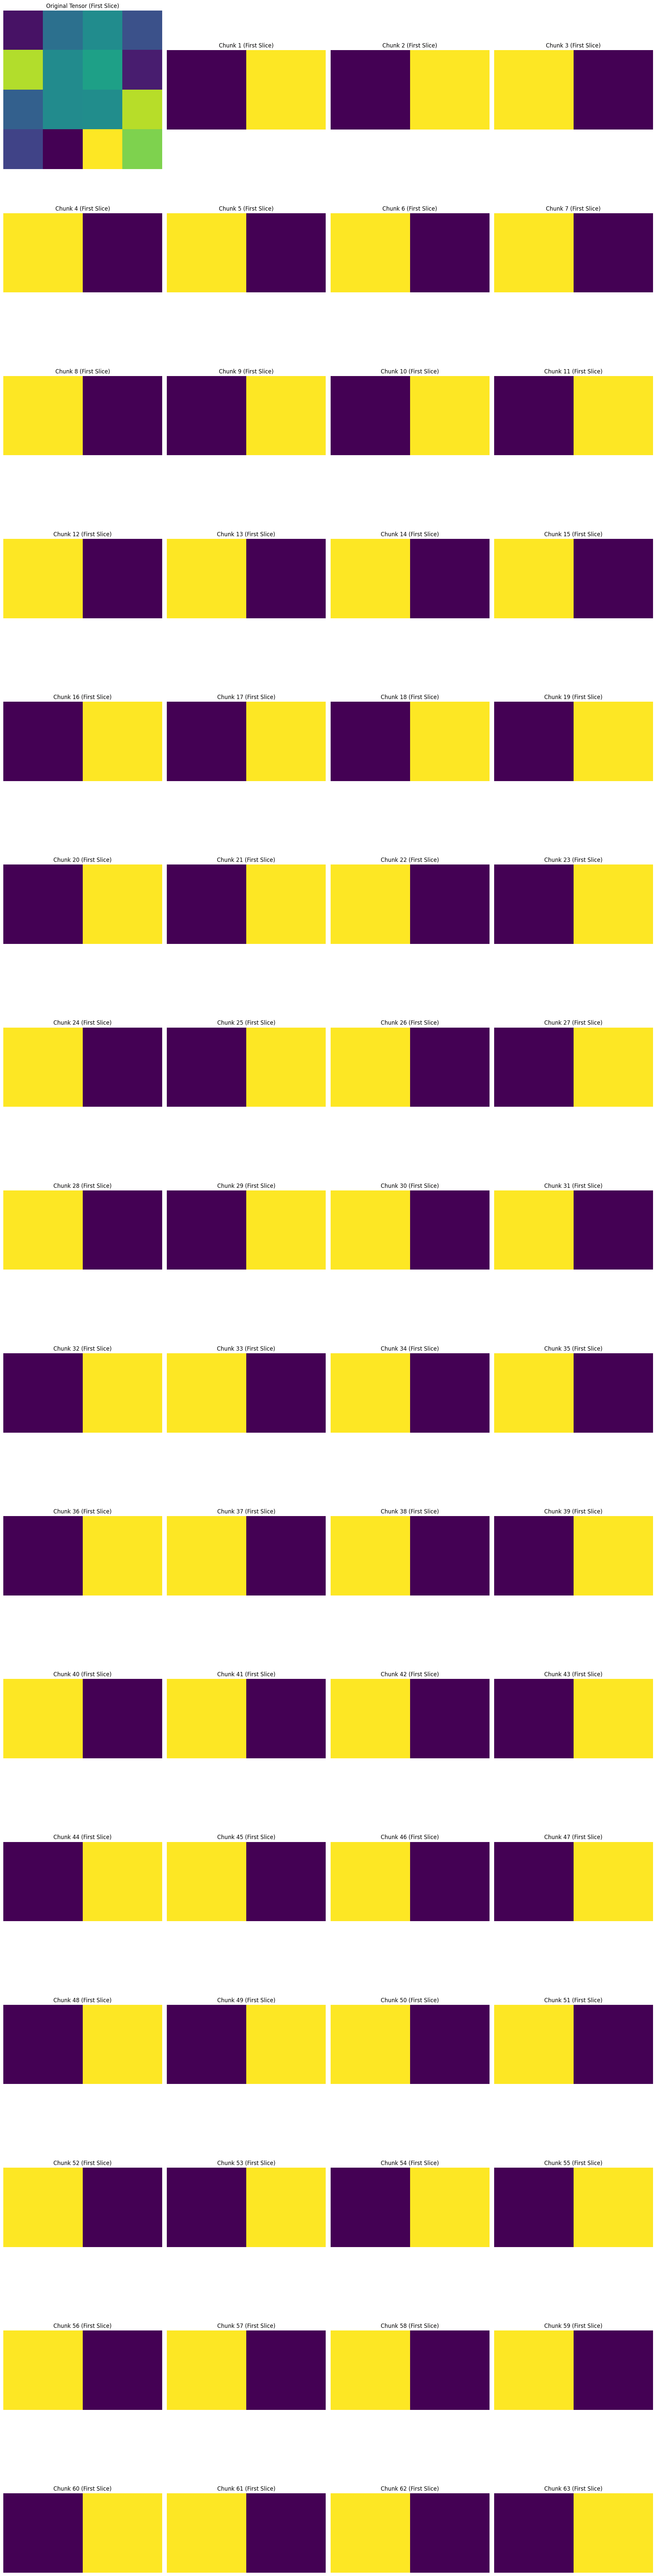

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def split_tensor_4d(tensor: np.ndarray, chunk_size: Tuple[int, ...]) -> List[np.ndarray]:
    """
    Split a 4D tensor into user-specified chunks.

    Args:
        tensor (np.ndarray): The input 4D tensor to be split.
        chunk_size (Tuple[int, ...]): The size of each chunk as a tuple of integers.

    Returns:
        List[np.ndarray]: A list of split chunks.
    """
    chunks = []
    for i in range(0, tensor.shape[0], chunk_size[0]):
        for j in range(0, tensor.shape[1], chunk_size[1]):
            for k in range(0, tensor.shape[2], chunk_size[2]):
                for l in range(0, tensor.shape[3], chunk_size[3]):
                    chunk = tensor[i:i+chunk_size[0], j:j+chunk_size[1], k:k+chunk_size[2], l:l+chunk_size[3]]
                    chunks.append(chunk)
    return chunks

def plot_tensor_and_chunks_4d(tensor: np.ndarray, chunks: List[np.ndarray]) -> None:
    """
    Plot the original 4D tensor and the split chunks together.

    Args:
        tensor (np.ndarray): The original 4D tensor.
        chunks (List[np.ndarray]): The list of split chunks.
    """
    num_chunks = len(chunks)
    num_cols = 4
    num_rows = (num_chunks + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
    axes = axes.flatten()

    axes[0].imshow(tensor[0, :, :, 0], cmap='viridis')
    axes[0].set_title("Original Tensor (First Slice)")
    axes[0].axis('off')

    for i, chunk in enumerate(chunks, start=1):
        if i < len(axes):
            axes[i].imshow(chunk[0, :, :, 0], cmap='viridis')
            axes[i].set_title(f"Chunk {i} (First Slice)")
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
tensor_4d = np.random.rand(4, 4, 4, 4)
chunk_size_4d = (1, 1, 2, 2)

chunks_4d = split_tensor_4d(tensor_4d, chunk_size_4d)
plot_tensor_and_chunks_4d(tensor_4d, chunks_4d)
